### Análise exploratória sobre o número de assassinatos nos estados brasileiros

* O conjunto de dados de segurança pública utilizado nesta análise exploratória foi retirado do site do Ministério da Justiça.   

* Utilizamos a segunda aba do arquivo onde contém informações sobre a quantidade de mortes em cada estado do Brasil entre o período de 2015 a 2022. As mortes estão divididas em 3 categorias de crimes.   

* O objetivo dessa análise é levantar algumas perguntas sobre a quantidade de assassinatos no Brasil e extrair informações úteis a partir delas. 

* Obs.: O dataset não possui dados sobre as vitimas do estado de São Paulo no ano de 2015 e, aparentemente, também faltam mais dados sobre as vitimas do ano de 2016. Além disso, alguns dos estados podem não ter dados sobre alguns meses.

* Fonte do conjunto de dados: https://dados.mj.gov.br/dataset/sistema-nacional-de-estatisticas-de-seguranca-publica

### Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec
import seaborn as sns

### Importando o dataset

In [2]:
data = pd.read_excel('indicadoressegurancapublicauf.xlsx', sheet_name=1)
data.rename(columns={'Sexo da Vítima': 'sexo', 'Tipo Crime': 'tipo_crime',
                    'Ano': 'ano', 'Mês':'mes', 'UF':'uf', 'Vítimas': 'vitimas'}, inplace = True)

### Visualizando o dataset

In [3]:
data.head()

,uf,tipo_crime,ano,mes,sexo,vitimas
0,Acre,Homicídio doloso,2022,janeiro,Feminino,2
1,Acre,Homicídio doloso,2022,janeiro,Masculino,8
2,Acre,Homicídio doloso,2022,janeiro,Sexo NI,0
3,Acre,Homicídio doloso,2022,fevereiro,Feminino,0
4,Acre,Homicídio doloso,2022,fevereiro,Masculino,10


In [4]:
data.tail()

,uf,tipo_crime,ano,mes,sexo,vitimas
19145,Tocantins,Roubo seguido de morte (latrocínio),2015,junho,Masculino,1
19146,Tocantins,Roubo seguido de morte (latrocínio),2015,julho,Masculino,1
19147,Tocantins,Roubo seguido de morte (latrocínio),2015,agosto,Masculino,1
19148,Tocantins,Roubo seguido de morte (latrocínio),2015,outubro,Masculino,2
19149,Tocantins,Roubo seguido de morte (latrocínio),2015,dezembro,Masculino,2


In [5]:
data.describe()

,ano,vitimas
count,19150.000000,19150.000000
mean,2018.505326,19.569452
std,2.245948,59.080997
min,2015.000000,0.000000
25%,2017.000000,0.000000
50%,2019.000000,1.000000
75%,2021.000000,7.000000
max,2022.000000,580.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19150 entries, 0 to 19149
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   uf          19150 non-null  object
 1   tipo_crime  19150 non-null  object
 2   ano         19150 non-null  int64 
 3   mes         19150 non-null  object
 4   sexo        19150 non-null  object
 5   vitimas     19150 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 897.8+ KB


### Quais são os tipos de crimes descritos no dataset?

In [7]:
print(data['tipo_crime'].unique())

['Homicídio doloso' 'Lesão corporal seguida de morte'
 'Roubo seguido de morte (latrocínio)']


### Qual o total de vítimas de cada categoria?

In [8]:
vitimas_num = data[['tipo_crime', 'vitimas']].groupby('tipo_crime').sum().reset_index()
vitimas_num

,tipo_crime,vitimas
0,Homicídio doloso,355060
1,Lesão corporal seguida de morte,5897
2,Roubo seguido de morte (latrocínio),13798


### Qual o total de vítimas de cada categoria a cada ano?

In [9]:
vitimas_num_ano = data[['tipo_crime', 'vitimas', 'ano']].groupby(['ano', 'tipo_crime']).sum()
vitimas_num_ano

vitimas
ano  tipo_crime                                  
2015 Homicídio doloso                       48673
     Lesão corporal seguida de morte          739
     Roubo seguido de morte (latrocínio)     1937
2016 Homicídio doloso                       51093
     Lesão corporal seguida de morte          763
     Roubo seguido de morte (latrocínio)     2235
2017 Homicídio doloso                       55950
     Lesão corporal seguida de morte          970
     Roubo seguido de morte (latrocínio)     2462
2018 Homicídio doloso                       48965
     Lesão corporal seguida de morte          903
     Roubo seguido de morte (latrocínio)     1987
2019 Homicídio doloso                       39646
     Lesão corporal seguida de morte          857
     Roubo seguido de morte (latrocínio)     1565
2020 Homicídio doloso                       42269
     Lesão corporal seguida de morte          741
     Roubo seguido de morte (latrocínio)     1311
2021 Homicídio doloso                       39608
     Lesão corporal seguida de morte          525
     Roubo seguido de morte (latrocínio)     1396
2022 Homicídio doloso                       28856
     Lesão corporal seguida de morte          399
     Roubo seguido de morte (latrocínio)      905

### Qual foi o ano que tiveram menos homicídios dolosos e o ano que tiveram mais?

In [10]:
# 2022 foi o ano com o menor número de homicídios dolosos (28.856) e 2017 foi o ano com o 
# maior número (55.950)

### Qual o estado com a maior quantidade de vítimas e o estado com a menor?

In [11]:
data_vit_uf = data[['uf', 'vitimas']].groupby('uf').sum().sort_values('vitimas', ascending=True).reset_index()
data_vit_uf

,uf,vitimas
0,Roraima,1575
1,Acre,2132
2,Amapá,2272
3,Tocantins,3062
4,Rondônia,3781
5,Distrito Federal,3958
6,Mato Grosso do Sul,4259
7,Piauí,5311
8,Santa Catarina,6427
9,Sergipe,7372


In [12]:
# Roraima teve a menor quantidade de vítimas (1.575), já a Bahia teve a maior quantidade (45.402)

### ---- Agora vamos visualizar de forma gráfica ----

### O número de vítimas aumentou ou diminuiu ao longo do tempo?

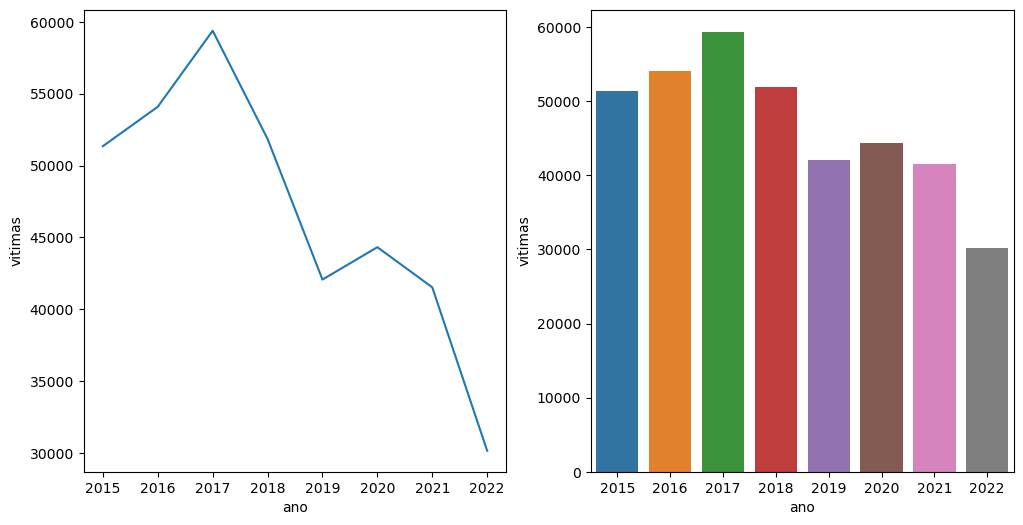

In [13]:
# Vamos visualizar com dois tipos de gráficos diferentes

vitimas_ano_line = data[['ano', 'vitimas']].groupby('ano').sum() 
vitimas_ano_bar = data[['ano', 'vitimas']].groupby('ano').sum().reset_index()

fig = plt.figure(figsize=(12, 6))
specs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(specs[:, 0])
ax2 = fig.add_subplot(specs[:, 1])

# Primeiro gráfico
ax1 = sns.lineplot(x='ano', y='vitimas', data=vitimas_ano_line, ax=ax1)

# Segundo gráfico
ax2 = sns.barplot(x='ano', y='vitimas', data=vitimas_ano_bar, ax=ax2)


### Quem morreu mais ao longo dos anos, homens ou mulheres?

In [14]:
vitimas_genero = data[['sexo', 'vitimas']].groupby('sexo').sum().reset_index()
vitimas_genero

,sexo,vitimas
0,Feminino,30699
1,Masculino,330493
2,Sexo NI,13563


### Agora com porcentagem

In [15]:
total_vitimas = vitimas_genero['vitimas'].sum()
vitimas_genero['Porcentagem'] = vitimas_genero['vitimas'].apply(lambda x: round(x/total_vitimas * 100, 2))
vitimas_genero

,sexo,vitimas,Porcentagem
0,Feminino,30699,8.19
1,Masculino,330493,88.19
2,Sexo NI,13563,3.62


[Text(0, 0, '30699'), Text(0, 0, '330493'), Text(0, 0, '13563')]

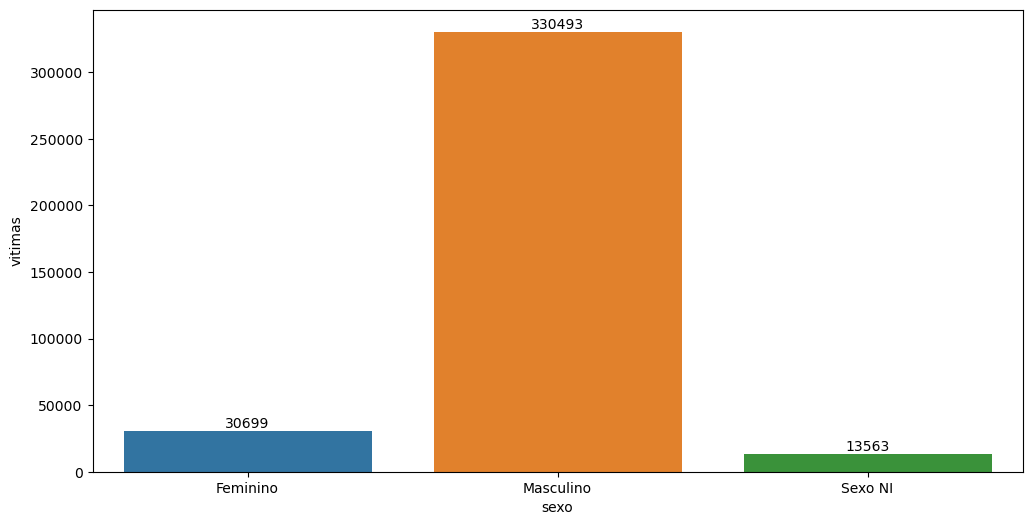

In [16]:
fig = plt.figure(figsize=(12, 6))
ax = sns.barplot(x='sexo', y='vitimas', data=vitimas_genero);
ax.bar_label(ax.containers[0])

In [17]:
# Homens estão entre o maior número de vítimas

### Quantidade de vítimas por estados

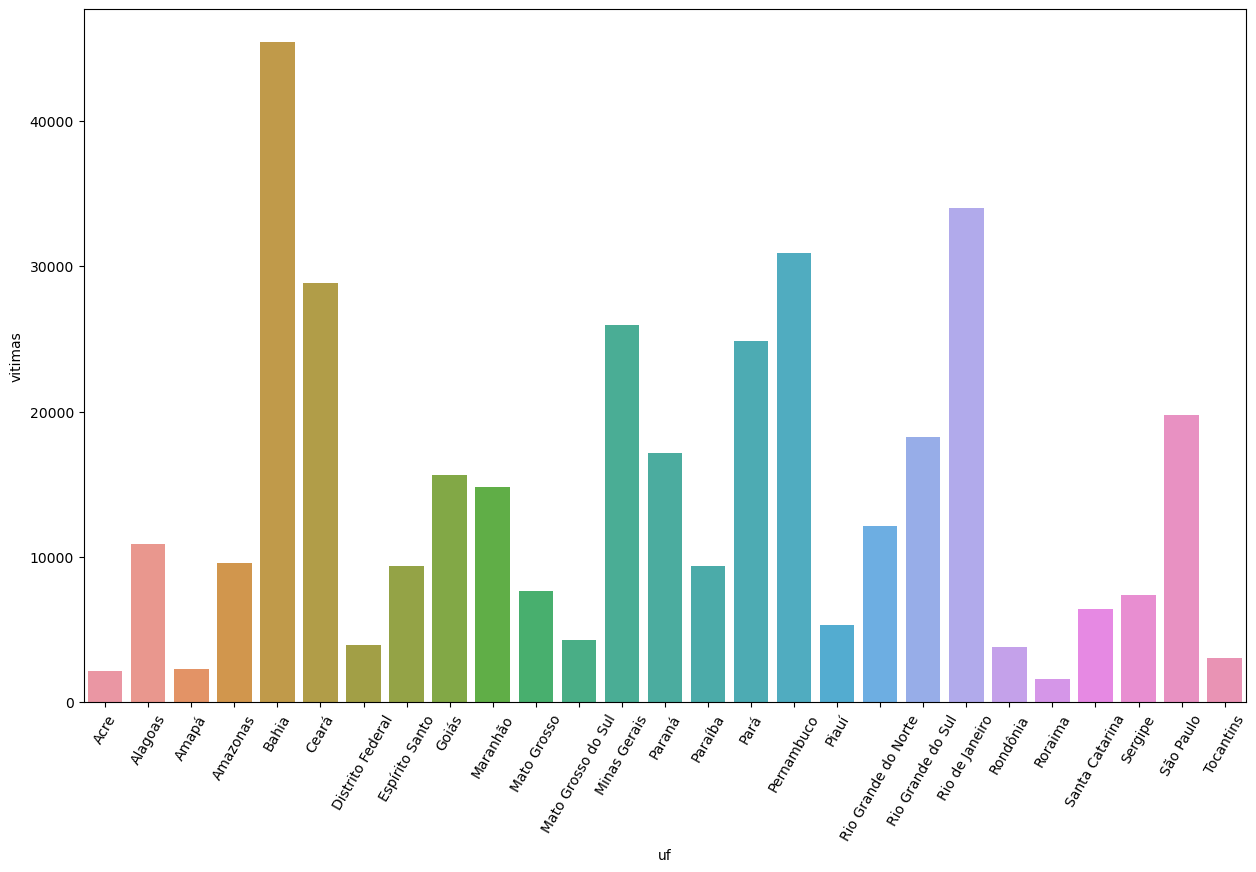

In [18]:
new_data_vit_uf = data[['uf', 'vitimas']].groupby('uf').sum().reset_index()
fig = plt.figure(figsize=(15, 9))
sns.barplot(x='uf', y='vitimas', data=new_data_vit_uf);
plt.xticks(rotation=60);

### Avaliando o número de vítimas de cada estado ao longo dos anos

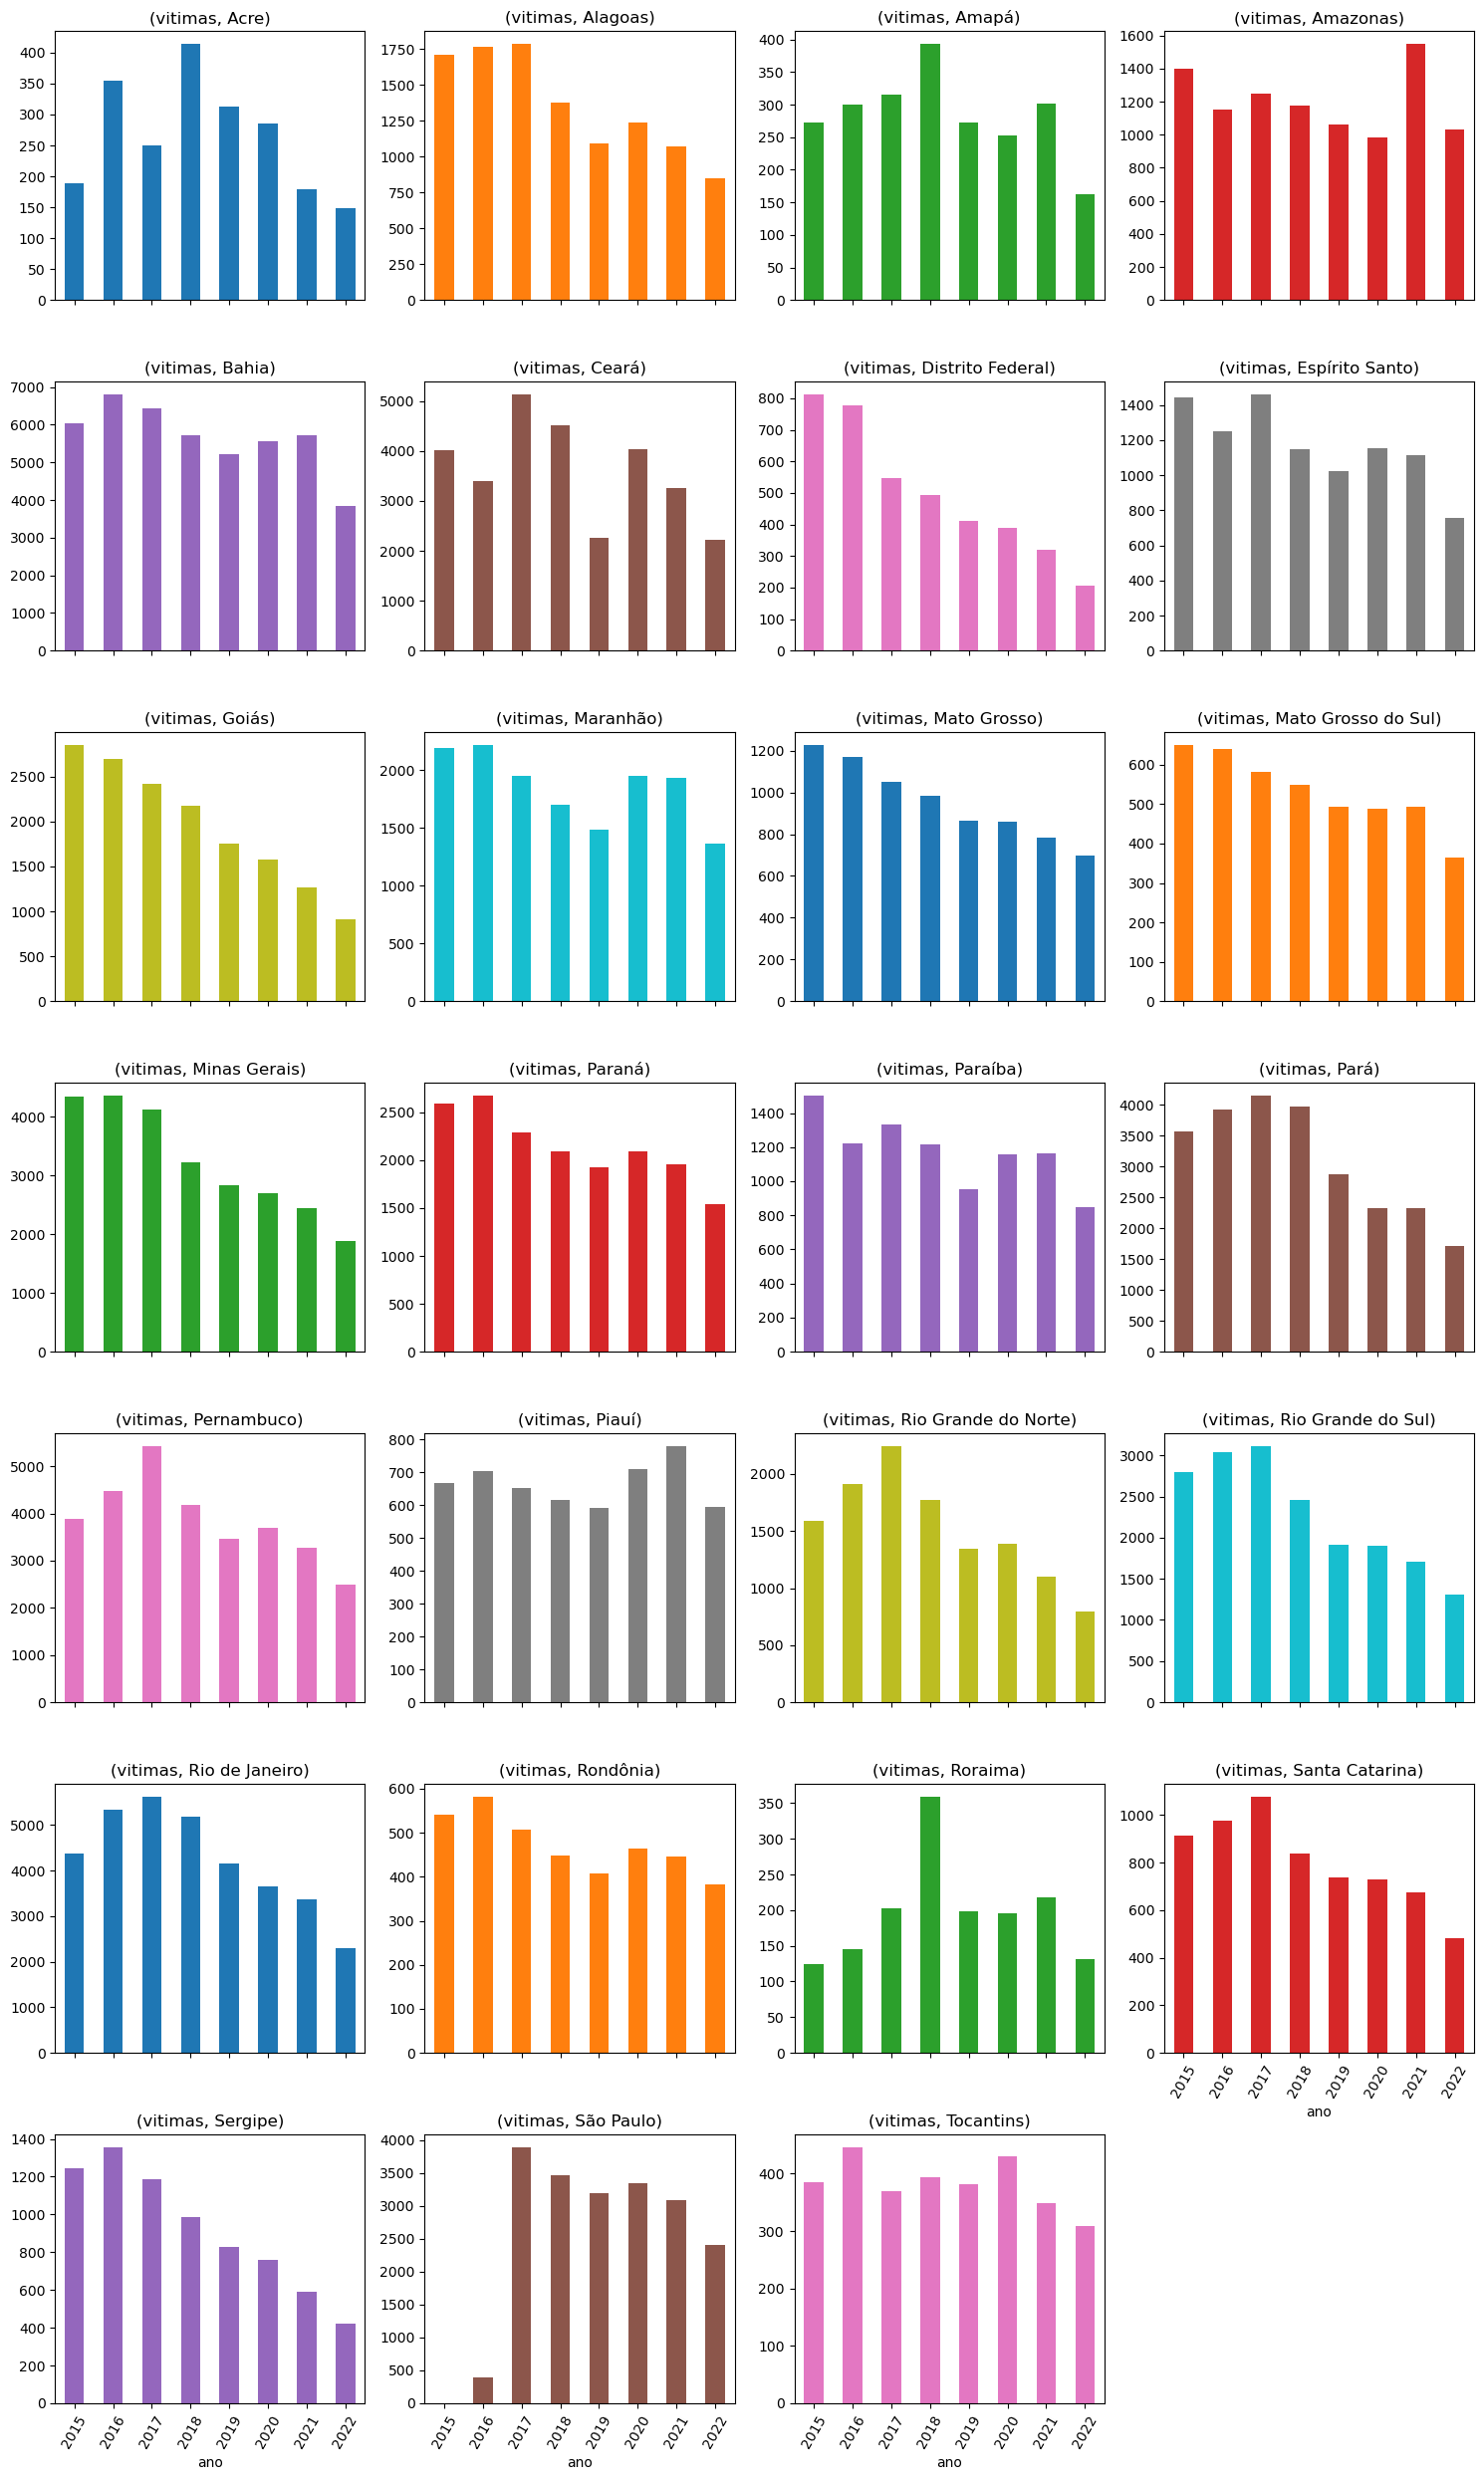

In [19]:
data_uf_ano = data[['uf', 'vitimas', 'ano']].groupby(['uf', 'ano']).sum()

ax = data_uf_ano.unstack(level=0).plot(kind='bar', legend=None, subplots=True, rot=60,
                                       figsize=(15, 25), layout=(7, 4))
plt.tight_layout();


### Avaliando o número de vítimas por mês no Rio de Janeiro

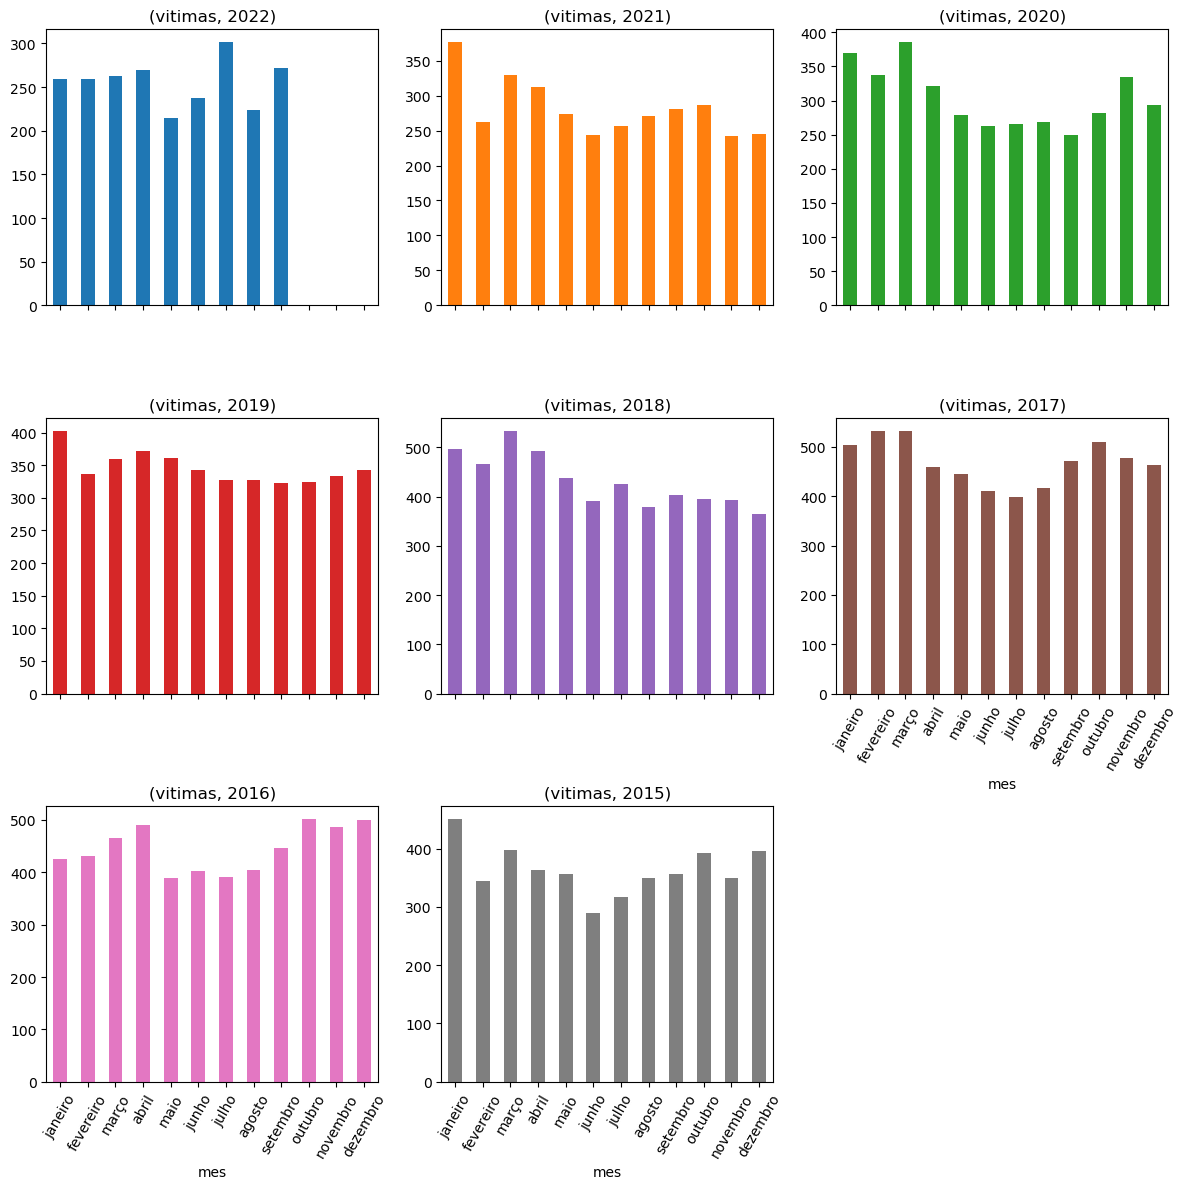

In [20]:
data_vit_rj = data.loc[data['uf'] == 'Rio de Janeiro', ['ano', 'mes', 'vitimas']].groupby(['ano', 'mes'],
sort=False).sum()

ax = data_vit_rj.unstack(level=0).plot(kind='bar', legend = None, subplots=True, rot=60, figsize=(12, 12), layout=(3, 3))
plt.tight_layout()

### Conclusões

* 2017 foi o ano em que ocorreram a maior quantidade de homicídios dolosos no Brasil e 2022 foi o ano com o menor número.

* Roraima foi o Estado com a menor quantidade de vítimas durante esse período, já a Bahia foi o estado com a maior quantidade.

* Houve uma redução considerável no número de vítimas do começo do período até o final.

* Homens correspondem a cerca de 88% das vítimas, enquanto mulheres correspondem a cerca de 8%.

* A maioria dos estados mostrou uma redução na quantidade de vítimas ao longo do período.

* No estado do Rio de Janeiro, ao longo dos anos, pode-se observar que a quantidade de vítimas era menor na metade do ano, entre os períodos de maio a agosto.

* Importante lembrar que apenas esse conjunto de dados não basta para definir quais são os estados mais e menos violentos. Para isso, normalmente utiliza-se a taxa de homicídios por 100 mil habitantes. Ex.: Pega-se o número de vítimas em um estado naquele ano, divide pelo total da população do estado no mesmo ano e em seguida multiplica por 100 mil.